## Data Exploration and Visualization 

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sales = pd.read_csv('./data_set/simple_vegetable_sales_data.csv')

In [3]:
# gruop
result = sales.groupby(['Month','Supplier_Name'])['Sales(kg)'].sum().reset_index()
print(result)

     Month Supplier_Name  Sales(kg)
0        1          Aldi    3251.27
1        1     Carrefour    3895.01
2        1        Costco    3344.06
3        1        Kroger    3679.11
4        1          Lidl    4811.10
..     ...           ...        ...
355     36         Metro    3469.36
356     36       Schwarz    4791.91
357     36        Target    2924.72
358     36         Tesco    3777.29
359     36       Walmart    3558.83

[360 rows x 3 columns]


In [4]:
print("total sales in all years")
print("  ")
result = sales.groupby('Supplier_Name')['Sales(kg)'].sum()
print(result)

total sales in all years
  
Supplier_Name
Aldi         116172.12
Carrefour    146832.92
Costco       117367.56
Kroger       142319.16
Lidl         174825.05
Metro        131748.24
Schwarz      169104.68
Target       111729.11
Tesco        140515.41
Walmart      131661.80
Name: Sales(kg), dtype: float64


In [5]:
sales["Supplier_Name"].describe()

count         360
unique         10
top       Walmart
freq           36
Name: Supplier_Name, dtype: object

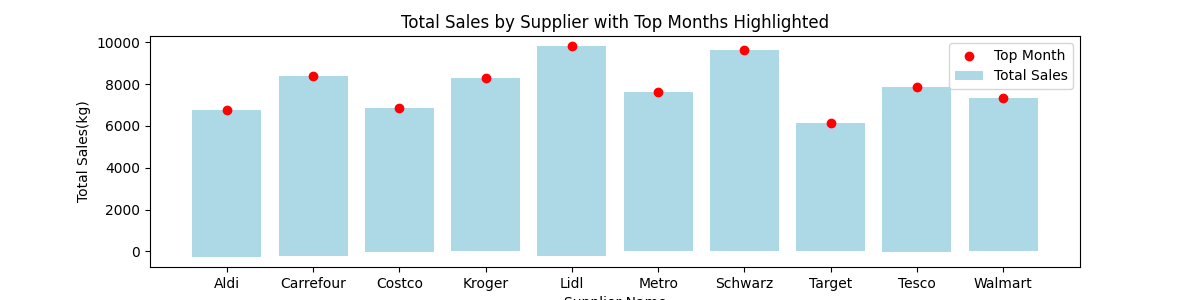

In [6]:
total_sales = sales.groupby(['Supplier_Name', 'Month'])['Sales(kg)'].sum().reset_index()


top_months = total_sales.loc[total_sales.groupby('Supplier_Name')['Sales(kg)'].idxmax()]

# Plot the bar chart
plt.figure(figsize=(12, 3))
plt.bar(total_sales['Supplier_Name'], total_sales['Sales(kg)'], color='lightblue', label='Total Sales')
plt.scatter(top_months['Supplier_Name'], top_months['Sales(kg)'], color='red', marker='o', label='Top Month')
 
plt.title('Total Sales by Supplier with Top Months Highlighted')
plt.xlabel('Supplier Name')
plt.ylabel('Total Sales(kg)')
plt.legend()
plt.show()

In [7]:
# Correlation matrix between month and sales(kg) excluding supplier name
# print(sales.corr(["Month", "Sales(kg)"]))

# this may lead to error ^

# Assuming your DataFrame is named 'sales'
# Drop the non-numeric column ('Supplier Name') before calculating the correlation matrix
numeric_columns = sales.drop("Supplier_Name", axis=1)

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

grouped_stats = sales.groupby("Supplier_Name")["Sales(kg)"].mean()
print(grouped_stats, "\n")

# Display the correlation matrix
print(correlation_matrix)


Supplier_Name
Aldi         3227.003333
Carrefour    4078.692222
Costco       3260.210000
Kroger       3953.310000
Lidl         4856.251389
Metro        3659.673333
Schwarz      4697.352222
Target       3103.586389
Tesco        3903.205833
Walmart      3657.272222
Name: Sales(kg), dtype: float64 

              Month  Sales(kg)
Month      1.000000  -0.721514
Sales(kg) -0.721514   1.000000


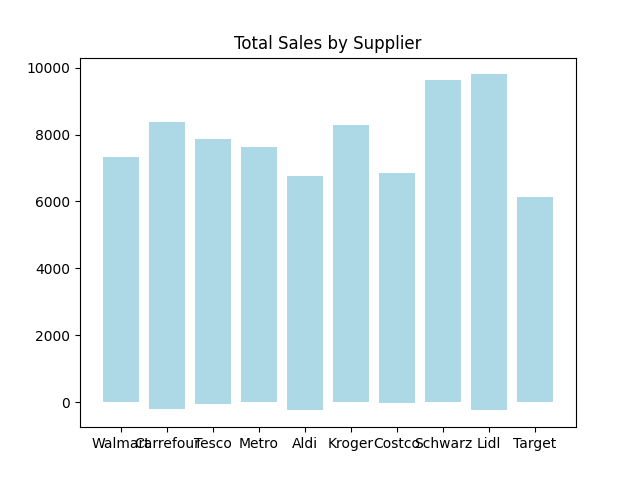

In [8]:
fig, ax = plt.subplots()
supplier = sales["Supplier_Name"]
month = sales["Month"]
sales_kg = sales["Sales(kg)"]

ax.bar(supplier, sales_kg, color='lightblue')
ax.set_title('Total Sales by Supplier')
plt.show()

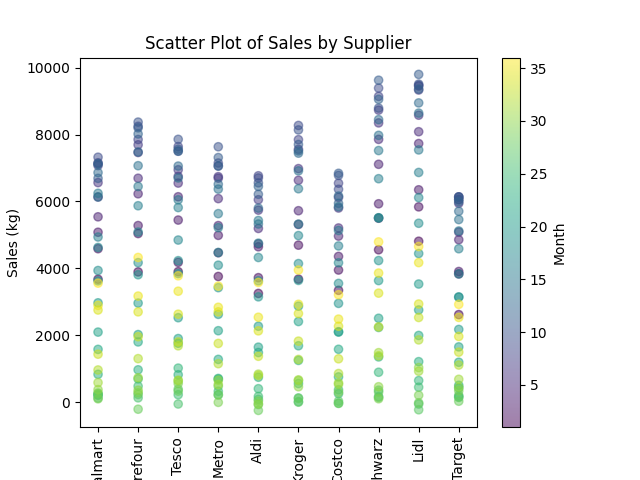

In [9]:

supplier_names = sales["Supplier_Name"]
sales_kg = sales["Sales(kg)"]
months = sales["Month"]

fig, ax = plt.subplots()
scatter = ax.scatter(supplier_names, sales_kg, c=months, cmap='viridis', alpha=0.5)

ax.set_xlabel('Supplier Name')
ax.set_ylabel('Sales (kg)')
ax.set_title('Scatter Plot of Sales by Supplier')

# Add colorbar for better interpretation
cbar = plt.colorbar(scatter)
cbar.set_label('Month')

plt.xticks(rotation=90)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7296\4139802049.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  camp = plt.cm.get_cmap("plasma")


0.181 sec. elapsed


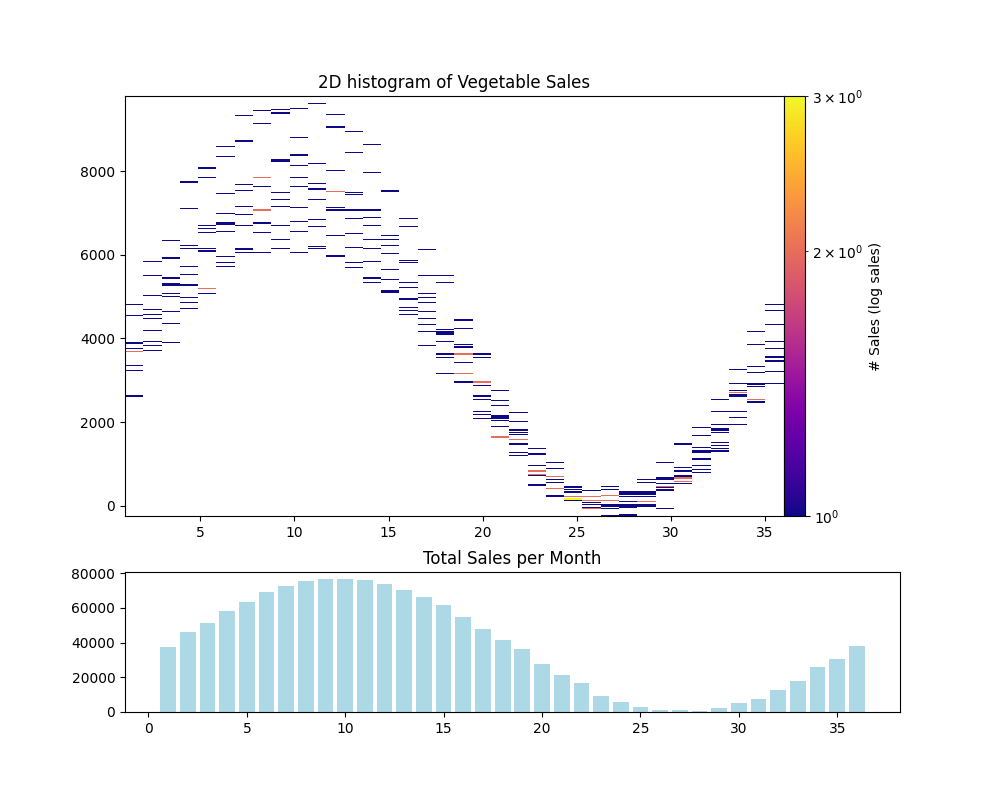

In [14]:
# heat map on the sales of each supplier in each month
fig, axes = plt.subplots(
    nrows=2, figsize=(10, 8), gridspec_kw={"height_ratios": [3, 1]}
)
# 2d histogram with log color scale
tic = time.time()
camp = plt.cm.get_cmap("plasma")

h, xedges, yedges = np.histogram2d(
    sales["Month"],
    sales["Sales(kg)"],
    bins=[sales["Month"].nunique(), sales["Sales(kg)"].nunique()],
)

pcm = axes[0].pcolormesh(xedges, yedges, h.T, cmap=camp, norm="log", rasterized=True)
fig.colorbar(pcm, ax=axes[0], label="# Sales (log sales)", pad=0)
axes[0].set_title("2D histogram of Vegetable Sales")

total_sales_per_month = sales.groupby("Month")["Sales(kg)"].sum()
axes[1].bar(total_sales_per_month.index, total_sales_per_month, color="lightblue")
axes[1].set_title("Total Sales per Month")

toc = time.time()
print(f"{toc-tic:.3f} sec. elapsed")

plt.show()